# Summary about the task and dataset
1. Dataset : Dataset is collected from Kaggle(https://www.kaggle.com/johndasilva/diabetes), Dataset of diabetes, taken from the hospital Frankfurt, Germany its have 9 columns , One target and 8 independent variable, Outcome column have 2 class 0 means "NOT diabetic" and 1 means "Diabetic"
2. Tasks :
 - Load datasets
 - Analysis on dataset
 - Check and handle  missing
 - Check and handle  Outlier
 - Check and handle  Skrewness
 - Create new feature
 - Check and handle imbalance
 - Modeling 
 - Logistic (Supervised leaning)
 - GaussianNB
 - KNN 
 - Decision Tree
 - Random Forest
 - Gradient Boosting
 - AdaBoostClassifier
 







# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load dataset
df =pd.read_csv(r"D:\STUDY\Github ML Content\Case_Study_on_dataset\Diabetes predictionwith logistic regression\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


NOTE : There are 8 independent variable and 1 target varaible y = Outcome ,as we can see there are missing values as zero

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Note : As we can see BMI value , Skinthickness  have Outlier and other column may also have the same   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


Note: There are no Categorical value in the dataset

# EDA : Exploratory Data Analysis

Note : Before we are moving to anaysis tell handle missing and Ouliers first 

### Handling Missing 

In [5]:
# Check point : Saving the dataset 
df_missing = df

In [6]:
# Covert all zero to nan but as we know pregnancies can be 0
df_missing[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_missing[['Glucose','BloodPressure',
                                                                      'SkinThickness','Insulin',
                                                                      'BMI']].replace(0,np.NaN)
# Values missing in the column for dataset
mis_val_percent = 100 * df_missing.isnull().sum() / len(df_missing)
print(mis_val_percent)

Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.50
SkinThickness               28.65
Insulin                     47.80
BMI                          1.40
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64


Note : Glucose=0.65,BloodPressure =4.5,SkinThickness= 28.65,Insulin =47.80,BMI= 1.40. this is the missing precentage of column ,There type of missing data is MCAR or MAR

Note: Techique to handle missing value for MCAR and MAR
1. Drop missing values/columns/rows
2. Single Imputation
 - Mean/median/mode
3. Multiple Imputation
 - KNN or logistic
    
    

Note : Lets drop some rows if there are 2 or more missing values

In [7]:
df_missing.shape

(2000, 9)

In [8]:
df_missing.dropna(axis=0,thresh=2,inplace=True)
df_missing.shape

(2000, 9)

Note : There are random missing in each column

Note : I m Using Mean/median/mode becuase there are outlier which can affect the KNN and other predictive model while impution

Note : BMI, GLUCOSE, Blood presure are those column which have less number of missing  so i can apply here Mean beacuse  When a Billionaire walks in a small bar, everyone becomes a millionaire" but if we apply mean to a small group that will not affect so much

In [9]:
for i in ['Glucose','BloodPressure','BMI']:
    mean = df_missing[i].mean()
    df_missing[i] = df_missing[i].fillna(mean)

Note : Now We will use median imputation on Higher percentage of missing value because median will work well when we have great number  of ouliers and missing values

In [10]:
for i in ['SkinThickness','Insulin']:
    median = df_missing[i].median()
    df_missing[i] = df_missing[i].fillna(median)

### Lets check the missing in after imputation 

In [11]:
# Values missing in the column for dataset
mis_val_percent = 100 * df_missing.isnull().sum() / len(df_missing)
print(mis_val_percent)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


Note : Nice "There are no missing " 

### Handling Ouliers

In [12]:
# Check Point : Saving the dataset
df_outlier = df_missing

1. Techiques to detect oultier in dataset
 - Univariant analysis / Bivariant analysis
 - Discover outliers with visualization tools (Box Plot ,Scatter Plot)
 - Zscore
 - IQR score
2. Correct / Remove Outlier Handling
 - Z-Score
 - IQR score 

Note : I m using BOX Plot because its easy and we have small dataset

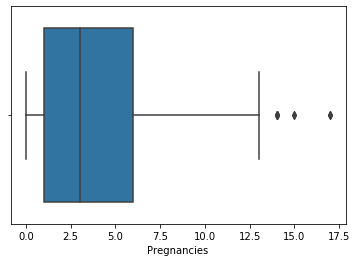

In [13]:
import seaborn as sns
#sns.set(style="whitegrid")
sns.boxplot(x=df_outlier["Pregnancies"])


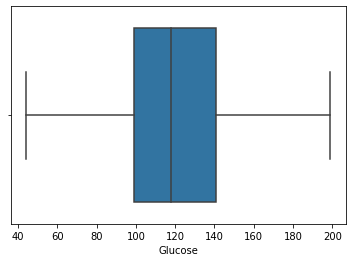

In [14]:
ax = sns.boxplot(x=df_outlier["Glucose"])

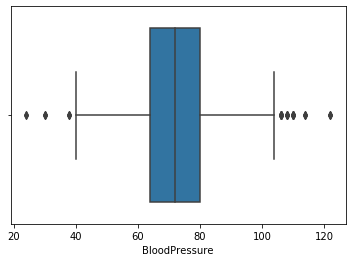

In [15]:
ax = sns.boxplot(x=df_outlier["BloodPressure"])

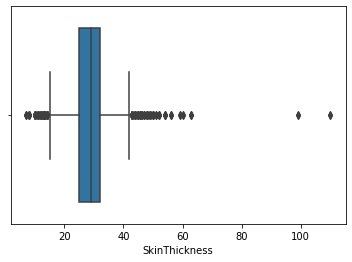

In [16]:
ax = sns.boxplot(x=df_outlier["SkinThickness"])

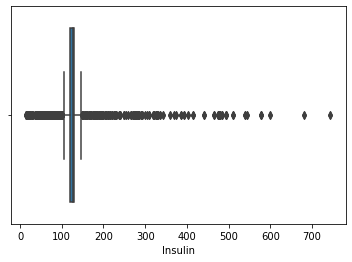

In [17]:
ax = sns.boxplot(x=df_outlier["Insulin"])

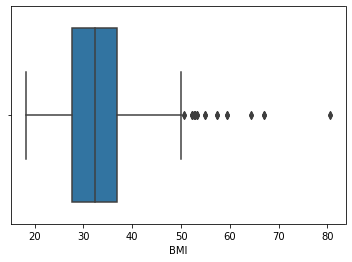

In [18]:
ax = sns.boxplot(x=df_outlier["BMI"])

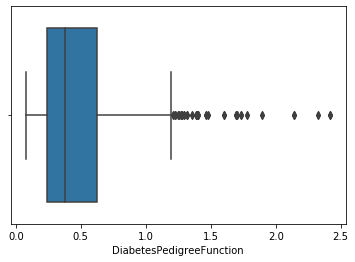

In [19]:
ax = sns.boxplot(x=df_outlier["DiabetesPedigreeFunction"])

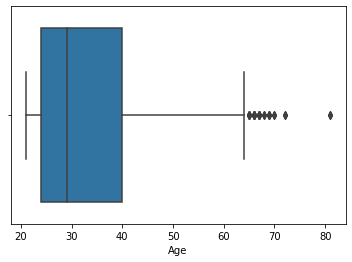

In [20]:
ax = sns.boxplot(x=df_outlier["Age"])

Note: As we can see from the boxplots there are lot of outliers in it, except Glucose

 Outlier treatment: lets remove some outlier but we are not removing lots of outlier because we have less data with us and we are removing outlier mostly from right side that is percential(0.75)

In [21]:
df_outlier.shape

(2000, 9)

In [22]:
Q1 = df_outlier.quantile(0.1)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1
df_outlier = df_outlier[~((df_outlier < (Q1 - 1.5 * IQR)) |(df_outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outlier.shape

(1735, 9)

### Handling Skewness

In [23]:
# Check Point : Saving the dataset
df_skewness = df_outlier

In [24]:
# skewness along the feature 
df_skewness.skew(axis = 0, skipna = True) 

Pregnancies                 0.939725
Glucose                     0.624801
BloodPressure               0.083872
SkinThickness               0.054766
Insulin                    -0.219837
BMI                         0.461050
DiabetesPedigreeFunction    1.089644
Age                         1.110920
Outcome                     0.775824
dtype: float64

Note : Skewness of that dataset is very less how ever skewness also affect the model performance so here we need to minimize
    skewness as much posible as we can 

Text(0.5, 1.0, 'DiabetesPedigreeFunction')

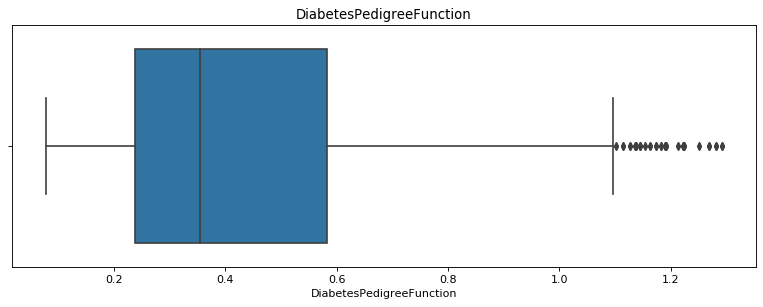

In [25]:
#Reducing the skewness only for column DiabetesPedigreeFunction, Age ,insulin
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df_skewness['DiabetesPedigreeFunction'])
plt.title('DiabetesPedigreeFunction')

Note : This is rightly skewed data 

Text(0.5, 1.0, 'Age')

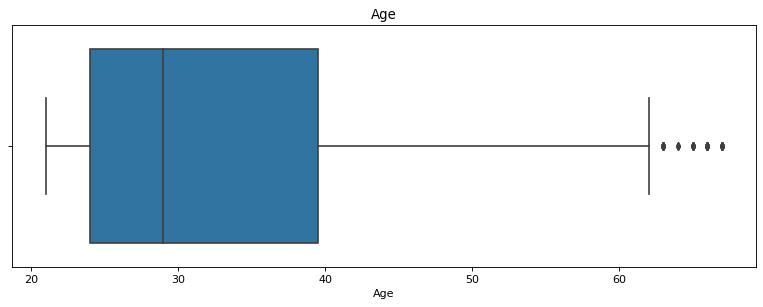

In [26]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df_skewness['Age'])
plt.title('Age')

Note : This is rightly skewed data 

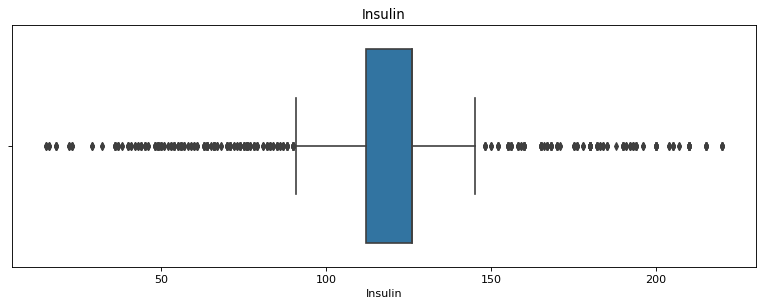

In [27]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df_skewness['Insulin'])
plt.title('Insulin');

Note : This is left skewed data 

In [28]:
# reducing Skewness in both the feature
#Box Cox Transformation
from scipy.stats import boxcox

#Some of the amount are zero so we need to shift the amount to make them positve . making a verysmall shift of amount 10^-9

df_skewness.loc[:,'DiabetesPedigreeFunction'] = df_skewness['DiabetesPedigreeFunction'] + 1e-9

#performing Box cox trasformation
df_skewness.loc[:,'DiabetesPedigreeFunction'], maxlog, (min_ci, max_ci) = boxcox(df_skewness['DiabetesPedigreeFunction'], alpha=0.01)

# checking skewness in DiabetesPedigreeFunction
df_skewness['DiabetesPedigreeFunction'].skew()


c:\users\mpillai2\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


-0.00395783022390789

In [29]:
# reducing Skewness in both the feature
#Box Cox Transformation
from scipy.stats import boxcox

#Some of the amount are zero so we need to shift the amount to make them positve . making a verysmall shift of amount 10^-9

df_skewness.loc[:,'Age'] = df_skewness['Age'] + 1e-9

#performing Box cox trasformation
df_skewness.loc[:,'Age'], maxlog, (min_ci, max_ci) = boxcox(df_skewness['Age'], alpha=0.01)

# checking skewness in DiabetesPedigreeFunction
df_skewness['Age'].skew()

0.14855209306655578

In [30]:
# reducing Skewness in both the feature
#Box Cox Transformation
from scipy.stats import boxcox

#Some of the amount are zero so we need to shift the amount to make them positve . making a verysmall shift of amount 10^-9

df_skewness.loc[:,'Insulin'] = df_skewness['Insulin'] + 1e-9

#performing Box cox trasformation
df_skewness.loc[:,'Insulin'], maxlog, (min_ci, max_ci) = boxcox(df_skewness['Insulin'], alpha=0.01)

# checking skewness in DiabetesPedigreeFunction
df_skewness['Insulin'].skew()

0.06328907182153765

### Adding new features

In [31]:
df_newfeature = df_skewness

In [32]:
df_newfeature['NF1'] = df_newfeature['BMI'] * df_newfeature['SkinThickness']
# BMI and SkinThickness are correlated positively
df_newfeature['NF2'] =  df_newfeature['Pregnancies'] / df_newfeature['Age']
# After 30 fertility starts to decline
df_newfeature['NF3'] = df_newfeature['Glucose'] / df_newfeature['DiabetesPedigreeFunction']
# Based on family histroy and glucose measure 
df_newfeature['NF4'] = df_newfeature['Age'] * df_newfeature['DiabetesPedigreeFunction']
# On which age mmost of the peple are diabets in family
df_newfeature['NF5'] = df_newfeature['Age'] / df_newfeature['Insulin']
# Insuline decrease when Age increase

c:\users\mpillai2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\mpillai2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mpillai2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.

In [33]:
df_newfeature.shape

(1735, 14)

### Handling model imbalance

In [34]:
df_imbalance = df_newfeature

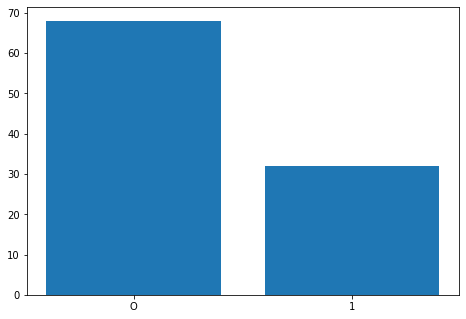

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['O', '1']
students = [(df_imbalance.shape[0] - df_imbalance['Outcome'].sum())*100/df_imbalance.shape[0],100 - ((df_imbalance.shape[0] - df_imbalance['Outcome'].sum())*100/df_imbalance.shape[0])]
ax.bar(langs,students)
plt.show()

Note : As we can see the Outcome is imbalane lets correct it 

Note : There are several ways to handle imbalance dataset
1. Undersampling : Here majority class will reduce..
2. Oversampling : Here minority class will increase...
3. Synthetic Minority Over-Sampling Technique (SMOTE) : Here we are genetrating a new point vectorially between 2 data points that belong to minority class (K-nearest neighbours) 
4. ADAptive SYNthetic (ADASYN) : same as smote but here it will also add density distibution , where as smote  the distubution will be uniform , create synthetic data for minority which are harder to learn ,rather than the easier ones

Note : Using ADAptive Synthetic

In [36]:
# feature data (predictors)
X = df_imbalance.iloc[:, :-1]
# label class
y = df_imbalance['Outcome']

In [37]:
df_missing

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.000000,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.000000,29.0,126.0,31.2,0.382,42,0
1998,0,129.0,110.000000,46.0,130.0,67.1,0.319,26,1


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [39]:
# Partition data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [40]:
from imblearn.over_sampling import ADASYN
from collections import Counter
# apply the ADASYN over-sampling
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 944, 1: 444})
Resampled dataset shape Counter({1: 945, 0: 944})


In [41]:
X_train_imbalance, y_train_imbalance = X_res, y_res
X_train, y_train =X_train_imbalance, y_train_imbalance 


### Handling Overfitting By PCA

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['f1','f2','f3','f4','f5','f6','f7','f8'])
#pca.explained_variance_ratio_


### Model Creation and Experiment

#### Logistic model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log=LogisticRegression()
log.fit(X_train,y_train)
log_y_pred_test = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, log_y_pred_test))
print("Precision:",metrics.precision_score(y_test, log_y_pred_test))
print("Recall:",metrics.recall_score(y_test, log_y_pred_test)) 
print("f1Score for train:",metrics.f1_score(y_train, log_y_pred_train, pos_label = 1))
print("f1Score for test :",metrics.f1_score(y_test, log_y_pred_test, pos_label = 1))


Accuracy: 0.9971181556195965
Precision: 0.990990990990991
Recall: 1.0
f1Score for train: 0.9994711792702274
f1Score for test : 0.9954751131221719


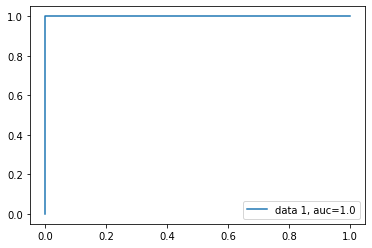

In [44]:
y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [45]:
# KNeighborsClassifier
from sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred_test = knn.predict(X_test)
knn_y_pred_train = knn.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, knn_y_pred_test))
print("Precision:",metrics.precision_score(y_test, knn_y_pred_test))
print("Recall:",metrics.recall_score(y_test, knn_y_pred_test)) 
print("f1Score for train:",metrics.f1_score(y_train, knn_y_pred_train, pos_label = 1))
print("f1Score for test :",metrics.f1_score(y_test, knn_y_pred_test, pos_label = 1))


Accuracy: 0.9942363112391931
Precision: 0.9821428571428571
Recall: 1.0
f1Score for train: 0.9973614775725593
f1Score for test : 0.9909909909909909


In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred_test = nb.predict(X_test)
nb_y_pred_train = nb.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, nb_y_pred_test))
print("Precision:",metrics.precision_score(y_test, nb_y_pred_test))
print("Recall:",metrics.recall_score(y_test, nb_y_pred_test)) 
print("f1Score for train:",metrics.f1_score(y_train, nb_y_pred_train, pos_label = 1))
print("f1Score for test :",metrics.f1_score(y_test, nb_y_pred_test, pos_label = 1))


Accuracy: 0.9827089337175793
Precision: 0.9814814814814815
Recall: 0.9636363636363636
f1Score for train: 0.9803296119085594
f1Score for test : 0.9724770642201834


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_y_pred_test = dt.predict(X_test)
dt_y_pred_train = dt.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred_test))
print("Precision:",metrics.precision_score(y_test, dt_y_pred_test))
print("Recall:",metrics.recall_score(y_test, dt_y_pred_test)) 
print("f1Score for train:",metrics.f1_score(y_train, dt_y_pred_train, pos_label = 1))
print("f1Score for test :",metrics.f1_score(y_test, dt_y_pred_test, pos_label = 1))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1Score for train: 1.0
f1Score for test : 1.0


In [48]:
from sklearn.ensemble  import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_y_pred_test = RF.predict(X_test)
RF_y_pred_train = RF.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, RF_y_pred_test))
print("Precision:",metrics.precision_score(y_test, RF_y_pred_test))
print("Recall:",metrics.recall_score(y_test, RF_y_pred_test)) 
print("f1Score for train:",metrics.f1_score(y_train, RF_y_pred_train, pos_label = 1))
print("f1Score for test :",metrics.f1_score(y_test, RF_y_pred_test, pos_label = 1))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1Score for train: 1.0
f1Score for test : 1.0


In [49]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_y_pred_test = ada.predict(X_test)
ada_y_pred_train = ada.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, ada_y_pred_test))
print("Precision:",metrics.precision_score(y_test, ada_y_pred_test))
print("Recall:",metrics.recall_score(y_test, ada_y_pred_test)) 
print("f1Score for train:",metrics.f1_score(y_train, ada_y_pred_train, pos_label = 1))
print("f1Score for test :",metrics.f1_score(y_test, ada_y_pred_test, pos_label = 1))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1Score for train: 1.0
f1Score for test : 1.0


In [50]:
from sklearn.ensemble  import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
GBC_y_pred_test = GBC.predict(X_test)
GBC_y_pred_train = GBC.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, GBC_y_pred_test))
print("Precision:",metrics.precision_score(y_test, GBC_y_pred_test))
print("Recall:",metrics.recall_score(y_test, GBC_y_pred_test)) 
print("f1Score for train:",metrics.f1_score(y_train, GBC_y_pred_train, pos_label = 1))
print("f1Score for test :",metrics.f1_score(y_test, GBC_y_pred_test, pos_label = 1))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1Score for train: 1.0
f1Score for test : 1.0


In [51]:
from sklearn.neural_network  import MLPClassifier
NN = MLPClassifier()
NN.fit(X_train, y_train)
NN_y_pred_test = NN.predict(X_test)
NN_y_pred_train = NN.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, NN_y_pred_test))
print("Precision:",metrics.precision_score(y_test, NN_y_pred_test))
print("Recall:",metrics.recall_score(y_test, NN_y_pred_test)) 
print("f1Score for train:",metrics.f1_score(y_train, NN_y_pred_train, pos_label = 1))
print("f1Score for test :",metrics.f1_score(y_test, NN_y_pred_test, pos_label = 1))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1Score for train: 1.0
f1Score for test : 1.0


Observations Logistic regression
1. Model Accuracy is 78 percentage directly apply to model
2. After handling missing and ouliers model accuracy is 79
3. After handling the skewness modele accuracy is  75
4. After creating new feature model accuracy is 75
5. After handling the outlier with imbalance case we are getting 100 % accuracy(model overfitting becasue we added bias in the data)
6. After handling the overfitting i m getting 99% accuracy logistic and 98 %Navie bayes and rest 100 %

Conclusion : Model is not overfitting and giving giving 100 % accuracy for most of the model.